# <center>『 밑바닥부터 시작하는 딥러닝 』</center>

<img src="http://image.kyobobook.co.kr/images/book/large/636/l9788968484636.jpg">

---

# 6장. 학습 관련 기술들

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#매개변수-갱신" data-toc-modified-id="매개변수-갱신-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>매개변수 갱신</a></span><ul class="toc-item"><li><span><a href="#모험가-이야기" data-toc-modified-id="모험가-이야기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>모험가 이야기</a></span></li><li><span><a href="#확률적-경사-하강법(SGD)" data-toc-modified-id="확률적-경사-하강법(SGD)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>확률적 경사 하강법(SGD)</a></span></li><li><span><a href="#SGD의-단점" data-toc-modified-id="SGD의-단점-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SGD의 단점</a></span></li><li><span><a href="#모멘텀(Momentum)" data-toc-modified-id="모멘텀(Momentum)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>모멘텀(Momentum)</a></span></li><li><span><a href="#AdaGrad" data-toc-modified-id="AdaGrad-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>AdaGrad</a></span></li><li><span><a href="#Adam" data-toc-modified-id="Adam-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Adam</a></span></li><li><span><a href="#어느-갱신-방법을-이용할-것인가?" data-toc-modified-id="어느-갱신-방법을-이용할-것인가?-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>어느 갱신 방법을 이용할 것인가?</a></span></li></ul></li><li><span><a href="#가중치의-초깃값" data-toc-modified-id="가중치의-초깃값-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>가중치의 초깃값</a></span><ul class="toc-item"><li><span><a href="#초깃값을-0으로-하면?" data-toc-modified-id="초깃값을-0으로-하면?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>초깃값을 0으로 하면?</a></span></li><li><span><a href="#은닉층의-활성화값-분포" data-toc-modified-id="은닉층의-활성화값-분포-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>은닉층의 활성화값 분포</a></span></li><li><span><a href="#ReLU를-사용할-때의-가중치-초깃값" data-toc-modified-id="ReLU를-사용할-때의-가중치-초깃값-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ReLU를 사용할 때의 가중치 초깃값</a></span></li></ul></li><li><span><a href="#배치-정규화" data-toc-modified-id="배치-정규화-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>배치 정규화</a></span><ul class="toc-item"><li><span><a href="#배치-정규화-알고리즘" data-toc-modified-id="배치-정규화-알고리즘-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>배치 정규화 알고리즘</a></span></li><li><span><a href="#배치-정규화의-효과" data-toc-modified-id="배치-정규화의-효과-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>배치 정규화의 효과</a></span></li></ul></li><li><span><a href="#바른-학습을-위해" data-toc-modified-id="바른-학습을-위해-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>바른 학습을 위해</a></span><ul class="toc-item"><li><span><a href="#오버피팅" data-toc-modified-id="오버피팅-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>오버피팅</a></span></li><li><span><a href="#가중치-감소" data-toc-modified-id="가중치-감소-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>가중치 감소</a></span></li><li><span><a href="#드롭아웃" data-toc-modified-id="드롭아웃-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>드롭아웃</a></span></li></ul></li><li><span><a href="#적절한-하이퍼파라미터-값-찾기" data-toc-modified-id="적절한-하이퍼파라미터-값-찾기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>적절한 하이퍼파라미터 값 찾기</a></span><ul class="toc-item"><li><span><a href="#검증-데이터" data-toc-modified-id="검증-데이터-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>검증 데이터</a></span></li><li><span><a href="#하이퍼파라미터-최적화" data-toc-modified-id="하이퍼파라미터-최적화-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>하이퍼파라미터 최적화</a></span></li><li><span><a href="#하이퍼파라미터-최적화-구현하기" data-toc-modified-id="하이퍼파라미터-최적화-구현하기-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>하이퍼파라미터 최적화 구현하기</a></span></li></ul></li></ul></div>

--- 

이번 장에서 다룰 주제는 다음과 같습니다.  

- 가중치 매개변수의 **최적값을 탐색**하는 최적화 방법
- 가중치 매개변수 **초깃값과 하이퍼파라미터 설정** 방법
- 오버피팅의 대응책인 **가중치 감소**와 **드롭아웃** 등의 정규화 방법
- 최근 많은 연구에서 사용하는 **배치 정규화**

이번 장에서 설명하는 기법을 이용하면 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있습니다.

## 매개변수 갱신

신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것입니다. 이는 곧 **매개변수의 최적값을 찾는 문제**며, 이를 **최적화(Optimization)**이라고 합니다. 매개변수 공간은 매우 넓고 복잡해서 최적화를 하는 것은 굉장히 어려운 문제입니다.  
우리는 지금까지 최적의 매개변수 값을 찾는 단서로 **매개변수의 기울기(미분)**를 이용했습니다. 이것히 **확률적 경사 하강법(SGD)**입니다.

### 모험가 이야기

세상에서 가장 깊고 낮은 골짜기를 찾는 모험가가 있습니다. 그는 눈을 가리고, 지도를 보지 않는 제약이 있습니다. 이 조건에서 어떻게 깊은 곳을 찾을 수 있을까요? 이 어려운 상황에서 가장 중요한 단서가 되는 것이 **땅의 기울기**입니다. 앞은 볼 수 없지만 지금 서 있는 땅의 기울기는 발바닥으로 느낄 수 있습니다. 그래서 **지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가자는 것이 SGD의 전략**입니다.

<img src="https://t1.daumcdn.net/cfile/tistory/9961913359D86B9833" width=40%>

### 확률적 경사 하강법(SGD)

SGD의 수식은 다음과 같이 쓸 수 있습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbOT18S%2FbtqAQ2Q2u0j%2FuqoDkUZ6qL7w6FbJEUIMJ1%2Fimg.png" width=30%>

여기에서 **W**는 **갱신할 가중치 매개변수**고, **dL/dW**는 W**에 대한 손실 함수의 기울기**입니다. **η(이타)**는 **학습률**을 의미하는데, 실제로는 0.01이나 0.001과 같은 값을 미리 정해서 사용합니다. 또 **<-**는 **우변의 값으로 좌변을 갱신하겠다**는 뜻입니다.  
식에서 알 수 있듯이 SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법입니다.

In [1]:
class SGD: 
    def __init__(self, lr = 0.01): 
        self.lr = lr 
        
    def update(self, params, grads): 
        for key in params.keys(): 
            params[key] -= self.lr * grads[key]

In [2]:
"""
network = TwoLayerNet(...) 
# optimizer는 최적화를 행하는 자라는 뜻의 단어
# SGD가 그 역할 수행
optimizer = SGD() 

for i in range(10000): 
    ... 
    x_batch, t_batch = get_mini_batch(...) #미니배치 
    grads = network.gradient(x_batch, t_batch) 
    params = network.params 
    optimizer.update(params, grads) 
    ...
"""

'\nnetwork = TwoLayerNet(...) \n# optimizer는 최적화를 행하는 자라는 뜻의 단어\n# SGD가 그 역할 수행\noptimizer = SGD() \n\nfor i in range(10000): \n    ... \n    x_batch, t_batch = get_mini_batch(...) #미니배치 \n    grads = network.gradient(x_batch, t_batch) \n    params = network.params \n    optimizer.update(params, grads) \n    ...\n'

### SGD의 단점

SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있습니다. 다음 함수의 최솟값을 구하는 문제를 생각해보겠습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcnBnA7%2FbtqA2NEJfKX%2FpVbMLSJQlk6WdbaZjPKefK%2Fimg.png" width=30%>

왼쪽과 같이 밥그릇을 x축 방향으로 늘인 듯한 모습이고, 실제로 그 등고선은 오른쪽과 같이 x축 방향으로 늘인 타원으로 되어 있습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FSK5pP%2FbtqA2ORbDoR%2FxghAKjgAd0cMYclNxxWu4K%2Fimg.png" width=60%>

기울기를 그려보면 다음과 같습니다. 최솟값이 되는 장소는 (x, y) = (0, 0)이지만, 다음 그림과 같이 기울기 대부분은 (0, 0) 방향을 가리키지 않는다는 것입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbV74AH%2FbtqA1AlyRvR%2FE1ClTJZf2bgYR7bz8Rhank%2Fimg.png" width=40%>

SGD의 단점은 **비등방성 함수**(방향에 따라 성질(여기서는 기울기)가 달라지는 함수)에서는 **탐색 경로가 비효율적**이라는 것입니다. SGD와 같이 무작정 기울어진 방향으로 진행하는 단순한 방식을 개선해주는 **모멘텀**, **AdaGrad**, **Adam**이라는 세 방식을 소개하겠습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrXbeW%2FbtqA2a71co0%2F1ZhB4at2JvAZzGQlmXKq80%2Fimg.png" width=40%>

### 모멘텀(Momentum)

**모멘텀(Momentum)**은 운동량을 뜻하는 단어로, 물리와 관계가 있습니다. 수식으로는 다음과 같이 쓸 수 있습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcvkTwU%2FbtqA1Ay6tEb%2Fc1sIZtfKzUeGOnLhLHgiO1%2Fimg.png">

- v(velocity)  
물리에서 말하는 속도
기울기 방향으로 힘을 받아 물체가 가속되는 물리 법칙
- a(alpha)  
0.9 등의 값으로 설정  

**av**항은 **물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할**을 합니다.

모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직입니다. SGD와 비교하면 **지그재그 정도가 덜한 것**을 알 수 있습니다. x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듭니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FI5GPo%2FbtqA05F6aAW%2Fm0cfUemfLTgUG0xKI9i5Pk%2Fimg.png" width=30%>

In [3]:
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

### AdaGrad

신경망 학습에서는 **학습률** 값이 중요합니다. 이 값이 너무 작으면 학습 시간이 길어지고, 너무 크면 발산하여 학습이 제대로 이뤄지지 않습니다.  
이 학습률을 정하는 효과적 기술로 **학습률 감소**가 있습니다. **학습을 진행하면서 학습률을 점차 줄여가는 방법**입니다. 학습률을 서서히 낮추는 가장 간단한 방법은 **매개변수 전체의 학습률을 일괄적으로** 낮추는 것입니다. 이를 발전시켜 **각각의 매개변수에 맞춤형 값을 맞춰주는 것**이 **AdaGrad**입니다.  

수식으로는 다음과 같습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcpZ6Tb%2FbtqA2aH7eEf%2FN0gb6Z2CI5BIC0JGAGKPO0%2Fimg.png" width=30%>

h라는 변수가 등장합니다. h는 위 식에서 보듯 기존 기울기 값을 제곱하여 계속 더해줍니다. (동그라미 기호는 행렬의 원소별 곱셈을 의미) 그리고 매개변수를 갱신할 때 1/sqrt(h)를 곱해 학습률을 조정합니다. 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻합니다.

아래 보면 회솟값을 향해 효율적으로 움직이는 것을 알 수 있습니다. 그러나 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됩니다. 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEfKgF%2FbtqA5Q2H4kh%2F8KA1ygW2eXPgYsnuSAys11%2Fimg.png" width=50%>

In [4]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### Adam

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였습니다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했습니다. 그럼 이 두 기법을 융합하면 어떻게 될까요? 이런 생각에서 출발한 기법이 바로 **Adam**입니다.

이 두 기법을 조합했다면 매개변수 공간을 효율적으로 탐색해줄 것을 기대할 수 있습니다. 또, 하이퍼파라미터의 **편향 보정**이 진행된다는 점도 Adam의 특징입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F7qrHU%2FbtqBtYlKN0s%2FAr8dLw2ePBk88jkgCkZajk%2Fimg.png" width=50%>

In [5]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 어느 갱신 방법을 이용할 것인가?

<img src="https://blog.kakaocdn.net/dn/In2fM/btqVRwpnfNw/nPaKGvelLWh3XWokEZpEw0/img.png">

어느 갱신 방법을 사용할 것인가는 풀어야 할 문제가 무엇인지, 하이퍼파라미터(ex.학습률)를 어떻게 설정하는지에 따라서 결과가 바뀝니다. 각자의 장단이 있어 모든 문제에서 항상 뛰어난 기법은 없습니다.  
지금도 많은 연구에서 SGD를 사용하며, 모멘텀과 AdaGrad도 시도해볼 만한 가치가 충분합니다. 요즘에는 많은 분이 **Adam**에 만족하며 쓰는 것 같습니다.  
일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타납니다.

## 가중치의 초깃값

**가중치의 초깃값을 무엇으로 설정하느냐**가 신경망 학습의 성패를 가르는 일이 실제로 자주 있습니다.

### 초깃값을 0으로 하면?

**가중치 감소(weight decay)**는 오버피팅을 억제해 범용 성능을 높이는 테크닉입니다. 가중치 감소는 간단히 말하면 매개변수의 값이 작아지도록 학습하는 벙빕으로, 오버피팅이 일어나지 않게 하는 것입니다.  
가중치를 작게 만들고 싶다면 초깃값도 최대한 작은 값에서 시작하는 것이 정공법입니다. 지금까지는 정규분포를 사용해 생성했습니다. 그렇다면 **가중치의 초깃값을 모두 0으로 설정**하면 어떻게 될까요? 그러면 학습이 올바로 이뤄지지 않습니다. 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문입니다. 이러한 상황을 막으려면 초깃값은 **무작위로 설정**해야 합니다.

### 은닉층의 활성화값 분포

여기서는 가중치의 초깃값에 따라 은닉층 확성화값들이 어떻게 변화하는지 간단한 실험을 해보려 합니다. 구체적으로는 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려보겠습니다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

표준편차가 1인 정규분포로    
w = np.random.randn(node_num, node_num) * 1

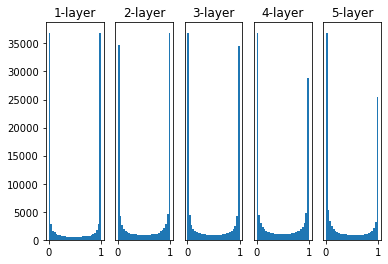

In [7]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

표준편차가 0.01인 정규분포로    
w = np.random.randn(node_num, node_num) * 0.01

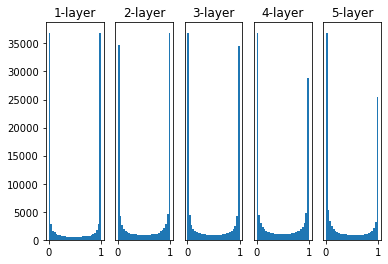

In [8]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값  
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num) 

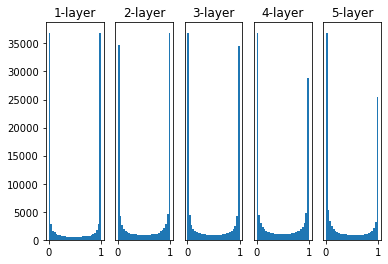

In [9]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### ReLU를 사용할 때의 가중치 초깃값

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과입니다. sigmoid와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있습니다. 그래서 Xavier 초깃값이 적당합니다.  
반면 **ReLU**를 이용할 때는 특화된 **He 초깃값**을 이용하라고 권장합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FyOfGP%2FbtqBt9IFCzR%2Fg12hWoTAQ7rKWQn5Uu5ZPk%2Fimg.png" width=50%>

## 배치 정규화

앞에서 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 배웠습니다. 그렇다면 **활성화를 적당히 퍼뜨리도록 '강제'해보면 어떨까요?** 이런 아이디어에서 출발한 방법이 **배치 정규화(Batch Normalization)**입니다.

### 배치 정규화 알고리즘

배치 정규화는 비교적 최근(2015)에 제안된 방법이지만, 많은 연구자와 기술자가 즐겨 사용하고 실제로 뛰어난 결과를 달성한 예가 많습니다. 배치 정규화가 주목받는 이유는 다음과 같습니다.  
- 학습을 빨리 진행할 수 있다.
- 초깃값에 크게 의존하지 않는다.
- 오버피팅을 억제한다.

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F997AE03A5AAAA64C2AE6A5">

배치 정규화는 학습 시 미니배치를 단위로 정규화합니다. 구체적으로는 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화합니다.

### 배치 정규화의 효과

배치 정규화가 학습을 빨리 진전시킴을 알 수 있습니다.
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcddfiv%2FbtqBDbflCh7%2FlwqN5rSBmojgkB3ZkX2vV1%2Fimg.png" width=40%>

가중치 초깃값의 표준편차를 다양하게 바꿔가며 살펴본 결과입니다. 거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타납니다. 실제로 배치 정규화를 이용하지 않는 경우엔 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 확인할 수 있습니다.
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwmPMl%2FbtqBDXOHUwx%2FicvyAsRtjvEOEvb7wkclmK%2Fimg.png" width=70%>

## 바른 학습을 위해

기계학습에서는 **오버피팅**이 문제가 되는 일이 많습니다. 오버피팅이란 **식녕망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태**를 말합니다. 기계학습은 범용 성능을 지향하기 때문에 그만큼 오버피팅을 억제하는 기술이 중요해지는 것입니다.

### 오버피팅

오버피팅은 다음과 같은 경우에 주로 일어납니다.
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

MNIST 데이터셋 중 300개만 사용하고, 7층 네트워크를 사용해 네트워크의 복잡성을 높인 후 정확도를 산출한 결과입니다. 이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응(fitting)해버린 결과입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F9ubyW%2FbtqBS5ZfhaM%2FTfbl4hKfdMVBE8lrgPsU50%2Fimg.png" width=50%>

### 가중치 감소

오버피팅 억제용으로 예로부터 많이 이용해온 방법 중 **가중치 감소(weight decay)** 라는 것이 있습니다. 이는 **학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법**입니다. 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVz5fV%2FbtqBSOclEpw%2F3kvCVNgLOWTVo5TJItwIFK%2Fimg.png" width=50%>

### 드롭아웃

가중치 감소는 간단하게 구현할 수 있고 어느정도 지나친 학습을 억제할 수 있습니다. 그러나 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워집니다. 이럴 때는 흔히 **드롭아웃(Dropout)**이라는 기법을 사용합니다.

드롭아웃은 **뉴런을 임의로 삭제하면서 학습하는 방법**입니다. **훈련** 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, **시험** 때는 모든 뉴런에 신호를 전달합니다. 단, 시험 때는 **각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력**합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdCpKoH%2FbtqBUTRhOFJ%2FAXLayQhklh6wV77GohH4A0%2Fimg.png" width=50%>

## 적절한 하이퍼파라미터 값 찾기

신경망에는 하이퍼파라미터가 다수 등장합니다. 여기서 말하는 하이퍼파라미터는 **각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소** 등 입니다.

### 검증 데이터

지금까지는 데이터셋을 **훈련 데이터(train data)**와 **시험 데이터(test data)**라는 두 가지로 분리해 이용했습니다. 앞으로 하이퍼파라미터를 다양한 값으로 설정하고 검증할 텐데, 여기서 주의할 점은 하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용해서 안 된다는 것입니다. 그래서 하이퍼파라미터를 조정할 때는 **검증 데이터(validation data)**가 필요합니다.  
- 훈련 데이터: 매개변수 학습
- 검증 데이터: 하이퍼파라미터 성능 평가
- 시험 데이터: 신경망의 범용 성능 평가

### 하이퍼파라미터 최적화

하이퍼파라미터를 최적화할 때의 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것입니다. 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸(샘플링) 후, 그 값으로 정확도를 평가합니다. 정확도를 잘 살피면서 이 작업을 여러 번 반복하며 하이퍼파라미터의 '최적 값'의 범위를 좁혀가는 것입니다.  

신경망의 하이퍼파라미터 최적화에서는 그리드 서치같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다고 알려져 있습니다.  

- 0단계  
하이퍼파라미터 값의 범위를 설정합니다.
- 1단계  
설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출합니다.
- 2단계  
1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다. (단, 에폭은 작게 설정합니다.)
- 3단계  
1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힙니다.

### 하이퍼파라미터 최적화 구현하기

In [10]:
# pass